#### Import and preprocess image dataset


In [1]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os
# The path of the main directory
dataset_dir=  '/content/drive/MyDrive/DiabeticRetinoPathyDataset2/messidor/'

 # The path of the train directory
train_dir = os.path.join(dataset_dir, 'train')


# The path of the normal directory inside train sub-directory
normal_train_dir = os.path.join(train_dir, 'normal')
# The path of the mild directory inside train sub-directory
mild_train_dir = os.path.join(train_dir, 'mild')
# The path of the severe directory inside train sub-directory
severe_train_dir = os.path.join(train_dir, 'severe')
# The path of the PDR directory inside train sub-directory
PDR_train_dir = os.path.join(train_dir, 'PDR')



***
#### Using Larger Dataset



In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
                    rescale=1./255
                    # rotation_range=40,
                    # width_shift_range=0.2,
                    # height_shift_range=0.2,
                    # horizontal_flip=True,
                    # zoom_range=0.2
                    )

# val_generator = ImageDataGenerator(rescale = 1./255)

In [16]:
train_iter = train_generator.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    interpolation = 'nearest')

# large_test_iter = val_gen.flow_from_directory(
#     directory = large_test_dir,
#     target_size = (224, 224),
#     class_mode = 'binary',
#     batch_size = 32)

Found 1200 images belonging to 4 classes.


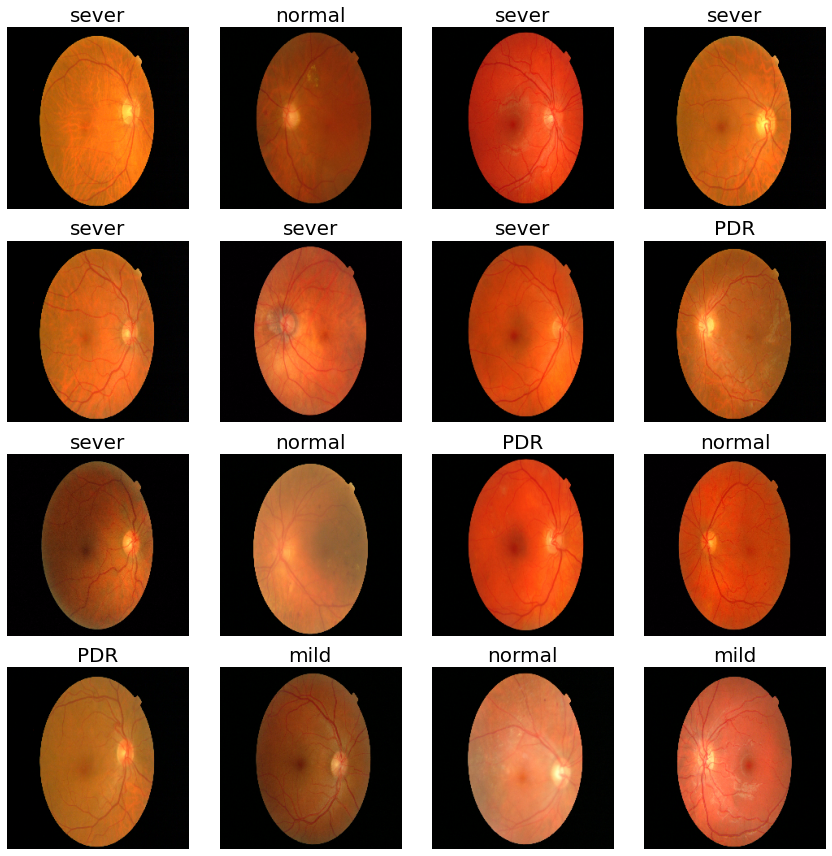

In [35]:
import matplotlib.pyplot as plt
import tensorflow as tf
images, labels = train_iter.next()

# the labels above are hot-encoded; converting them to sparse representation
sparse_labels = tf.keras.backend.argmax(labels, axis = 1).numpy()
class_names = ['normal', 'mild', 'sever', 'PDR']
plt.figure(figsize = (12, 12))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(images[i])
  # plt.title(sparse_labels[i])
  plt.title(class_names[int(sparse_labels[i])], fontsize = 20)
  plt.axis('off')

plt.tight_layout()

In [36]:

from tensorflow.keras.applications import ResNet50
model = ResNet50(
    include_top = False,
    weights = None,
    input_shape = (224, 224, 3)
)

for layer in model.layers:
  layer.trainable = True


model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [37]:
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow as tf
last_layer_output = model.output
x = layers.Flatten()(last_layer_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dense(512, activation = 'relu')(x)
x = layers.Dense(4, activation = 'softmax')(x)

model = Model(model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:

history = model.fit(train_iter,  epochs = 3)

Epoch 1/3
38/38 [==============================] - 627s 15s/step - loss: 15.1063 - accuracy: 0.3250
Epoch 2/3
20/38 [==============>...............] - ETA: 2:44 - loss: 3.1365 - accuracy: 0.4022

# References
1. [How to Choose the Best Keras Pre-Trained Model for Image Classification](https://towardsdatascience.com/how-to-choose-the-best-keras-pre-trained-model-for-image-classification-b850ca4428d4)
2. [Use pre-trained Huggingface models in TensorFlow Serving](https://towardsdatascience.com/use-pre-trained-huggingface-models-in-tensorflow-serving-d2761f7e69f6)
3. [Transfer Learning in Keras with Computer Vision Models](https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/)
4. [Top 4 Pre-Trained Models for Image Classification with Python Code](https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/)
5. [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf)
6. [Keras Applications
](https://keras.io/api/applications/#usage-examples-for-image-classification-models)
7. [AlexNet: The First CNN to win Image Net](https://www.mygreatlearning.com/blog/alexnet-the-first-cnn-to-win-image-net/)
8. [Introduction to The Architecture of Alexnet](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/)
9. [AlexNet: The Architecture that Challenged CNNs](https://towardsdatascience.com/alexnet-the-architecture-that-challenged-cnns-e406d5297951)
10. [Understanding AlexNet](https://learnopencv.com/understanding-alexnet/)
11. [AlexNet – ImageNet Classification with Deep Convolutional Neural Networks](https://neurohive.io/en/popular-networks/alexnet-imagenet-classification-with-deep-convolutional-neural-networks/)
12. [Architecture of AlexNet and its current use](https://iq.opengenus.org/architecture-and-use-of-alexnet/)
13. [Transfer Learning Guide: A Practical Tutorial With Examples for Images and Text in Keras](https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras)
14. [TensorFlow 2 Tutorial: Get Started in Deep Learning With tf.keras](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)
15. [Tensorflow Keras Tutorial - Neural Network (Part 1)](https://www.kaggle.com/akashkr/tf-keras-tutorial-neural-network-part-1)
16. [Tensorflow Keras Tutorial - Convolutional Neural Network (Part 2)](https://www.kaggle.com/akashkr/tf-keras-tutorial-cnn-part-2)
17. [Tensorflow Keras Tutorial - Binary Classification (Part 3)](https://www.kaggle.com/akashkr/tf-keras-tutorial-binary-classification-part-3)
18. [Tensorflow Keras Tutorial - Using Pretrained Models and Multiclass Classification (Part 4)](https://www.kaggle.com/akashkr/tf-keras-tutorial-pretrained-models-part-4)
19. [Tensorflow Keras Tutorial - Basics of NLP (Part 5)](https://www.kaggle.com/akashkr/tf-keras-tutorial-basics-of-nlp-part-5)

# References for Underfitting and Overfitting
1. [Underfitting and Overfitting in machine learning and how to deal with it !!!](https://towardsdatascience.com/underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6fe4a8a49dbf)
2. [What Are Overfitting and Underfitting in Machine Learning?](https://towardsdatascience.com/what-are-overfitting-and-underfitting-in-machine-learning-a96b30864690)
3. [Tackling Underfitting And Overfitting Problems In Data Science](https://analyticsindiamag.com/tackling-underfitting-and-overfitting-problems-in-data-science/)
4. [Overfitting and Underfitting With Machine Learning Algorithms](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)